<a href="https://colab.research.google.com/github/AmitS1009/ML_Projects/blob/main/Spam_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("/content/SMSSpamCollection.tsv", sep="\t", names = ['label','text'])

In [ ]:
df.head(
)

,label,text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [ ]:
df.shape

(5568, 2)

In [ ]:
for i in range(20):
  print(df.iloc[i,-1])
  print()


I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

Nah I don't think he goes to usf, he lives around here though

Even my brother is not like to speak with me. They treat me like aids patent.

I HAVE A DATE ON SUNDAY WITH WILL!!

As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.

Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08

Data Cleaning

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
sn = SnowballStemmer("english")
stop = set(stopwords.words('english'))

In [ ]:
def clean_text(sms):
  sms = sms.lower()
  sms = re.sub("[^a-z0-9]", ' ', sms)
  sms = nltk.word_tokenize(sms)
  sms = [t for t in sms if len(t)>1]
  sms = [sn.stem(word) for word in sms if word not in stop]
  sms = " ".join(sms)
  return sms

In [ ]:
clean_text("Get is ...  are .... playing they UNLIMITED <!!!!>,,,,,????? Free data play   100 GB ....///// at Rs. 0")


'get play unlimit free data play 100 gb rs'

In [ ]:
df['clean_text'] = df['text'].apply(clean_text)

In [ ]:
df.head()

,label,text,clean_text
0,ham,I've been searching for the right words to tha...,search right word thank breather promis wont t...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkts 21s...
2,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though
3,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aid patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday


WordCloud :

In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
df['label'] == 'ham'

,label
0,True
1,False
2,True
3,True
4,True
...,...
5563,False
5564,True
5565,True
5566,True


In [ ]:
hamdata = df[df['label'] == 'ham']
hamdata

,label,text,clean_text
0,ham,I've been searching for the right words to tha...,search right word thank breather promis wont t...
2,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though
3,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aid patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday
5,ham,As per your request 'Melle Melle (Oru Minnamin...,per request mell mell oru minnaminungint nurun...
...,...,...,...
5561,ham,Huh y lei...,huh lei
5564,ham,Will ü b going to esplanade fr home?,go esplanad fr home
5565,ham,"Pity, * was in mood for that. So...any other s...",piti mood suggest
5566,ham,The guy did some bitching but I acted like i'd...,guy bitch act like interest buy someth els nex...


In [ ]:
hamdata = df[df['label'] == 'ham']
hamdata = hamdata['clean_text'].values
hamdata

array(['search right word thank breather promis wont take help grant fulfil promis wonder bless time',
       'nah think goe usf live around though',
       'even brother like speak treat like aid patent', ...,
       'piti mood suggest',
       'guy bitch act like interest buy someth els next week gave us free',
       'rofl true name'], dtype=object)

In [ ]:
' '.join(hamdata) # make all data from ham text into 1 single text;

'search right word thank breather promis wont take help grant fulfil promis wonder bless time nah think goe usf live around though even brother like speak treat like aid patent date sunday per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun gon na home soon want talk stuff anymor tonight cri enough today oh watch eh rememb spell name yes naughti make wet fine way feel way gota serious spell name go tri month ha ha joke pay first lar da stock comin aft finish lunch go str lor ard smth lor finish ur lunch alreadi ffffffffff alright way meet sooner forc eat slice realli hungri tho suck mark get worri know sick turn pizza lol lol alway convinc catch bus fri egg make tea eat mom left dinner feel love back amp pack car let know room ahhh work vagu rememb feel like lol wait still clear sure sarcast want live us yeah got apologet fallen actin like spoilt child got caught till go bad cheer tell anyth fear faint housework quick cuppa yup ok go

In [ ]:
def wordcloud(data):
  words = ' '.join(data)
  wc = WordCloud(width=1000, height=500, background_color='white')
  wc = wc.generate(words)
  plt.axis("off")
  plt.imshow(wc)

Ham Data words : 


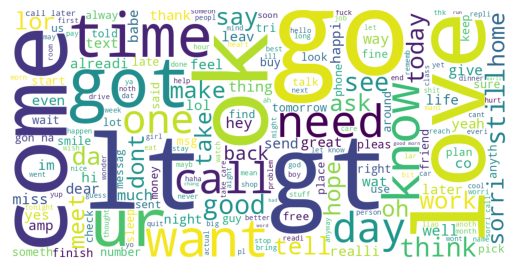

In [ ]:
print("Ham Data words : ")
wordcloud(hamdata)

In [ ]:
spamdata = df[df['label'] == 'spam']
spamdata = spamdata['clean_text']

Spam Data words : 


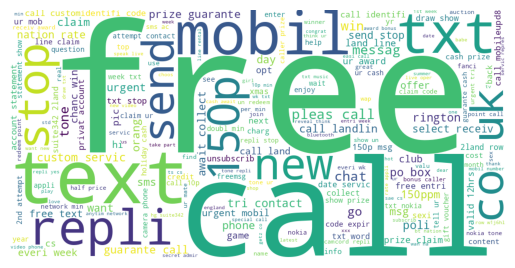

In [ ]:
print("Spam Data words : ")
wordcloud(spamdata)

Featuization :

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
cv = CountVectorizer(max_features=5000)

In [ ]:
X = cv.fit_transform(df['clean_text']).toarray()

In [ ]:
X.shape

(5568, 5000)

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
y = pd.get_dummies(df['label'])
y = y['spam'].values

In [ ]:
y

array([False,  True, False, ..., False, False, False])

Model Building :

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.naive_bayes import MultinomialNB


In [ ]:
model = MultinomialNB()

In [ ]:
model.fit(x_train, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_test, y_pred

(array([ True, False, False, ..., False, False, False]),
 array([ True,  True, False, ..., False, False, False]))

In [ ]:
pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

,Actual,Predicted
0,True,True
1,False,True
2,False,False
3,False,False
4,False,False
...,...,...
1109,False,False
1110,False,False
1111,False,False
1112,False,False


Model Evaluation :

In [ ]:
print("Accuracy on Training Data :")
print(model.score(x_train, y_train))


Accuracy on Training Data :
0.9910193084867535


In [ ]:
print("Accuracy on Testing Data :")
print(model.score(x_test, y_test))

Accuracy on Testing Data :
0.9865350089766607


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report


In [ ]:
confusion_matrix(y_test, y_pred)

array([[949,   6],
       [  9, 150]])

In [ ]:
y_test.shape

(1114,)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99       955
        True       0.96      0.94      0.95       159

    accuracy                           0.99      1114
   macro avg       0.98      0.97      0.97      1114
weighted avg       0.99      0.99      0.99      1114



In [ ]:
f1_score(y_test, y_pred)

0.9523809523809523